In [1]:
import pandas as pd
import numpy as np
import spotipy
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from spotipy.oauth2 import SpotifyClientCredentials
from config import *

In [2]:
hot = pd.read_csv("./data/hot_100_extended.csv")
not_hot = pd.read_csv("./data/not_so_hot_extended.csv")

In [3]:
# Drop extra id column
hot.drop(["id"], axis=1, inplace=True)
not_hot.drop(["id"], axis=1, inplace=True)

# Display dataframes
display(hot.head())
display(hot.shape)
display(not_hot.head())
display(not_hot.shape)

,artist,title,ids,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,Doja Cat,Paint The Town Red,56y1jOTK0XSvJzVv9vHQBK,0.864,0.556,2,-7.683,0,0.1940,0.2550,0.000004,0.112,0.726,99.974,audio_features,spotify:track:56y1jOTK0XSvJzVv9vHQBK,https://api.spotify.com/v1/tracks/56y1jOTK0XSv...,https://api.spotify.com/v1/audio-analysis/56y1...,230480,4
1,SZA,Snooze,4iZ4pt7kvcaH6Yo8UoZ4s2,0.559,0.551,5,-7.231,1,0.1320,0.1410,0.000000,0.110,0.392,143.008,audio_features,spotify:track:4iZ4pt7kvcaH6Yo8UoZ4s2,https://api.spotify.com/v1/tracks/4iZ4pt7kvcaH...,https://api.spotify.com/v1/audio-analysis/4iZ4...,201800,4
2,Taylor Swift,Cruel Summer,2EGaDf0cPX789H3LNeB03D,0.666,0.871,1,-6.017,0,0.0272,0.2700,0.020800,0.263,0.936,108.501,audio_features,spotify:track:2EGaDf0cPX789H3LNeB03D,https://api.spotify.com/v1/tracks/2EGaDf0cPX78...,https://api.spotify.com/v1/audio-analysis/2EGa...,215326,4
3,Luke Combs,Fast Car,1Lo0QY9cvc8sUB2vnIOxDT,0.712,0.603,8,-5.520,1,0.0262,0.1860,0.000000,0.115,0.670,97.994,audio_features,spotify:track:1Lo0QY9cvc8sUB2vnIOxDT,https://api.spotify.com/v1/tracks/1Lo0QY9cvc8s...,https://api.spotify.com/v1/audio-analysis/1Lo0...,265493,4
4,Jung Kook & Jack Harlow,3D,2pLZ6tUBapqlngc9lnYz4M,0.865,0.785,1,-3.313,1,0.0483,0.0221,0.000000,0.286,0.836,108.031,audio_features,spotify:track:2pLZ6tUBapqlngc9lnYz4M,https://api.spotify.com/v1/tracks/2pLZ6tUBapql...,https://api.spotify.com/v1/audio-analysis/2pLZ...,162545,4


(100, 20)

,artist,title,ids,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,Ghostemane,Mercury: Retrograde,2Vc6NJ9PW9gD9q343XFRKx,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,audio_features,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4
1,Don Kenobi,Pathology,7pgJBLVz5VmnL7uGHmRj6p,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,audio_features,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4
2,gizmo,Symbiote,0vSWgAlfpye0WCGeNmuNhy,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,audio_features,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4
3,Kamiyada+,ProductOfDrugs (Prod. The Virus and Antidote),0VSXnJqQkwuH2ei1nOQ1nu,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,audio_features,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3
4,$uicideboy$,Venom,4jCeguq9rMTlbMmPHuO7S3,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,audio_features,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4


(3000, 20)

In [4]:
# Add hot and not marker column
hot["hot"] = ["Yes"]*len(hot)
not_hot["hot"] = ["No"]*len(not_hot)

In [5]:
# Concatinating 2 dataframes rows
all_songs = pd.concat([hot, not_hot], axis=0)
display(all_songs.shape)
display(all_songs.head())
display(all_songs.tail())

(3100, 21)

,artist,title,ids,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,hot
0,Doja Cat,Paint The Town Red,56y1jOTK0XSvJzVv9vHQBK,0.864,0.556,2,-7.683,0,0.1940,0.2550,...,0.112,0.726,99.974,audio_features,spotify:track:56y1jOTK0XSvJzVv9vHQBK,https://api.spotify.com/v1/tracks/56y1jOTK0XSv...,https://api.spotify.com/v1/audio-analysis/56y1...,230480,4,Yes
1,SZA,Snooze,4iZ4pt7kvcaH6Yo8UoZ4s2,0.559,0.551,5,-7.231,1,0.1320,0.1410,...,0.110,0.392,143.008,audio_features,spotify:track:4iZ4pt7kvcaH6Yo8UoZ4s2,https://api.spotify.com/v1/tracks/4iZ4pt7kvcaH...,https://api.spotify.com/v1/audio-analysis/4iZ4...,201800,4,Yes
2,Taylor Swift,Cruel Summer,2EGaDf0cPX789H3LNeB03D,0.666,0.871,1,-6.017,0,0.0272,0.2700,...,0.263,0.936,108.501,audio_features,spotify:track:2EGaDf0cPX789H3LNeB03D,https://api.spotify.com/v1/tracks/2EGaDf0cPX78...,https://api.spotify.com/v1/audio-analysis/2EGa...,215326,4,Yes
3,Luke Combs,Fast Car,1Lo0QY9cvc8sUB2vnIOxDT,0.712,0.603,8,-5.520,1,0.0262,0.1860,...,0.115,0.670,97.994,audio_features,spotify:track:1Lo0QY9cvc8sUB2vnIOxDT,https://api.spotify.com/v1/tracks/1Lo0QY9cvc8s...,https://api.spotify.com/v1/audio-analysis/1Lo0...,265493,4,Yes
4,Jung Kook & Jack Harlow,3D,2pLZ6tUBapqlngc9lnYz4M,0.865,0.785,1,-3.313,1,0.0483,0.0221,...,0.286,0.836,108.031,audio_features,spotify:track:2pLZ6tUBapqlngc9lnYz4M,https://api.spotify.com/v1/tracks/2pLZ6tUBapql...,https://api.spotify.com/v1/audio-analysis/2pLZ...,162545,4,Yes


,artist,title,ids,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,hot
2995,Tomkillsjerry,Focus,1YiFZjmohJD78nlsSjjHGT,0.644,0.301,10,-8.927,0,0.0308,0.03160,...,0.0919,0.0768,119.989,audio_features,spotify:track:1YiFZjmohJD78nlsSjjHGT,https://api.spotify.com/v1/tracks/1YiFZjmohJD7...,https://api.spotify.com/v1/audio-analysis/1YiF...,250697,4,No
2996,Tomkillsjerry,The Cure,7o5E34q2K5cpQfy2P1WEGW,0.603,0.555,8,-10.284,0,0.0277,0.01680,...,0.1070,0.1290,220.036,audio_features,spotify:track:7o5E34q2K5cpQfy2P1WEGW,https://api.spotify.com/v1/tracks/7o5E34q2K5cp...,https://api.spotify.com/v1/audio-analysis/7o5E...,219168,4,No
2997,Tomkillsjerry,Blocks,0Wdp9TyN3PqCoxSzH8vRwO,0.626,0.367,8,-11.263,1,0.0343,0.00349,...,0.3730,0.1290,130.002,audio_features,spotify:track:0Wdp9TyN3PqCoxSzH8vRwO,https://api.spotify.com/v1/tracks/0Wdp9TyN3PqC...,https://api.spotify.com/v1/audio-analysis/0Wdp...,189806,4,No
2998,Tomkillsjerry,Liu Kang,2K7NWYBbqGzNLggH7LIhxy,0.616,0.572,11,-9.371,0,0.0755,0.01100,...,0.1440,0.0389,113.338,audio_features,spotify:track:2K7NWYBbqGzNLggH7LIhxy,https://api.spotify.com/v1/tracks/2K7NWYBbqGzN...,https://api.spotify.com/v1/audio-analysis/2K7N...,247928,5,No
2999,Tomkillsjerry,Malvada,7bHO5sfLqKChU9FtQPlInR,0.520,0.407,9,-11.677,0,0.0394,0.27700,...,0.0901,0.0688,200.094,audio_features,spotify:track:7bHO5sfLqKChU9FtQPlInR,https://api.spotify.com/v1/tracks/7bHO5sfLqKCh...,https://api.spotify.com/v1/audio-analysis/7bHO...,235259,4,No


In [6]:
all_songs.dtypes

artist               object
title                object
ids                  object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
type                 object
uri                  object
track_href           object
analysis_url         object
duration_ms           int64
time_signature        int64
hot                  object
dtype: object

In [7]:
# Drop the columns that we won't use for clustering
X = all_songs.select_dtypes(include=np.number).drop(columns=["key", "mode", "duration_ms", "time_signature"])
X

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.864,0.556,-7.683,0.1940,0.25500,0.000004,0.1120,0.7260,99.974
1,0.559,0.551,-7.231,0.1320,0.14100,0.000000,0.1100,0.3920,143.008
2,0.666,0.871,-6.017,0.0272,0.27000,0.020800,0.2630,0.9360,108.501
3,0.712,0.603,-5.520,0.0262,0.18600,0.000000,0.1150,0.6700,97.994
4,0.865,0.785,-3.313,0.0483,0.02210,0.000000,0.2860,0.8360,108.031
...,...,...,...,...,...,...,...,...,...
2995,0.644,0.301,-8.927,0.0308,0.03160,0.856000,0.0919,0.0768,119.989
2996,0.603,0.555,-10.284,0.0277,0.01680,0.907000,0.1070,0.1290,220.036
2997,0.626,0.367,-11.263,0.0343,0.00349,0.956000,0.3730,0.1290,130.002
2998,0.616,0.572,-9.371,0.0755,0.01100,0.921000,0.1440,0.0389,113.338


In [8]:
X.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,3100.000000,3100.000000,3100.000000,3100.000000,3100.000000,3100.000000,3100.000000,3100.00000,3100.000000
mean,0.660523,0.620619,-7.968271,0.144241,0.179232,0.140679,0.181857,0.31193,150.748059
std,0.151043,0.171985,3.091715,0.131377,0.219073,0.286309,0.142338,0.21372,28.450507
min,0.136000,0.000243,-24.203000,0.024200,0.000008,0.000000,0.030700,0.02920,74.038000
25%,0.562000,0.497000,-9.819500,0.045300,0.017200,0.000000,0.101000,0.14000,129.948250
50%,0.674000,0.619000,-7.656500,0.083200,0.086250,0.000066,0.120000,0.26800,145.025500
75%,0.772000,0.751250,-5.825000,0.217000,0.258000,0.050675,0.206250,0.44825,165.075250
max,0.985000,0.995000,0.551000,0.859000,0.984000,0.971000,0.958000,0.96500,220.290000


In [9]:
# Scaling the data and saving the scaler
import pickle

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
filename = "./models/scaler.pickle"

with open(filename, "wb") as file:
        pickle.dump(scaler,file)

X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
display(X.head())
print()
display(X_scaled_df.head())

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.864,0.556,-7.683,0.1940,0.2550,0.000004,0.112,0.726,99.974
1,0.559,0.551,-7.231,0.1320,0.1410,0.000000,0.110,0.392,143.008
2,0.666,0.871,-6.017,0.0272,0.2700,0.020800,0.263,0.936,108.501
3,0.712,0.603,-5.520,0.0262,0.1860,0.000000,0.115,0.670,97.994
4,0.865,0.785,-3.313,0.0483,0.0221,0.000000,0.286,0.836,108.031


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,1.347366,-0.375788,0.092284,0.378815,0.345914,-0.491420,-0.490864,1.937757,-1.784933
1,-0.672252,-0.404865,0.238505,-0.093187,-0.174545,-0.491434,-0.504917,0.374712,-0.272097
2,0.036270,1.456062,0.631231,-0.891023,0.414396,-0.418773,0.570165,2.920510,-1.485171
3,0.340868,-0.102464,0.792009,-0.898636,0.030899,-0.491434,-0.469784,1.675689,-1.854539
4,1.353988,0.955938,1.505967,-0.730390,-0.717375,-0.491434,0.731779,2.452532,-1.501694


In [10]:
K = range(2, 21)

inertia = []
silhouette = []

for k in K:
    print("Training a K-Means model with {} clusters!".format(k))
    kmeans = KMeans(n_clusters=k, random_state=1234, verbose=1)
    kmeans.fit(X_scaled_df)
    
    filename = "./models/kmeans_" + str(k) + ".pickle"
    with open(filename, "wb") as file:
        pickle.dump(kmeans, file)

    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))

Training a K-Means model with 2 clusters!
Initialization complete
Iteration 0, inertia 33006.32689389612.
Iteration 1, inertia 25102.076427288594.
Iteration 2, inertia 24155.587696164956.
Iteration 3, inertia 23783.430839692683.
Iteration 4, inertia 23656.303237034765.
Iteration 5, inertia 23591.595865039373.
Iteration 6, inertia 23556.454203428635.
Iteration 7, inertia 23538.42830598628.
Iteration 8, inertia 23527.049093941496.
Iteration 9, inertia 23521.783028941052.
Iteration 10, inertia 23519.886683703604.
Iteration 11, inertia 23518.40291300454.
Iteration 12, inertia 23517.051379872195.
Iteration 13, inertia 23516.502244202955.
Iteration 14, inertia 23516.243829749394.
Converged at iteration 14: center shift 8.076530655906763e-05 within tolerance 9.999999999999992e-05.
Initialization complete
Iteration 0, inertia 34340.98302495567.
Iteration 1, inertia 24608.78557596167.
Iteration 2, inertia 24398.727567707043.
Iteration 3, inertia 24258.10282396887.
Iteration 4, inertia 24085.386

/Users/faryal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 32604.310214352783.
Iteration 1, inertia 25306.183074838184.
Iteration 2, inertia 24942.517840115524.
Iteration 3, inertia 24732.667706971195.
Iteration 4, inertia 24505.518003358702.
Iteration 5, inertia 24261.419739995.
Iteration 6, inertia 24017.2480301242.
Iteration 7, inertia 23832.4158929592.
Iteration 8, inertia 23714.056176306505.
Iteration 9, inertia 23624.72278598571.
Iteration 10, inertia 23572.85944062621.
Iteration 11, inertia 23544.62378142267.
Iteration 12, inertia 23528.037613870853.
Iteration 13, inertia 23520.20179160293.
Iteration 14, inertia 23518.508861119568.
Iteration 15, inertia 23517.722305090967.
Iteration 16, inertia 23516.865012357346.
Iteration 17, inertia 23515.913832494294.
Iteration 18, inertia 23515.503851151072.
Converged at iteration 18: center shift 5.691141655339963e-05 within tolerance 9.999999999999992e-05.
Initialization complete
Iteration 0, inertia 35205.542704311825.
Iteration 1, inertia 24291.919224318965.
Iteration 2, in

/Users/faryal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 4 clusters!
Initialization complete
Iteration 0, inertia 26563.886336824937.
Iteration 1, inertia 19719.048087578976.
Iteration 2, inertia 19227.071198702313.
Iteration 3, inertia 19103.60198678153.
Iteration 4, inertia 19058.566283260025.
Iteration 5, inertia 19041.883808678336.
Iteration 6, inertia 19035.752005036586.
Iteration 7, inertia 19031.838137321374.
Iteration 8, inertia 19030.405659646345.
Iteration 9, inertia 19028.79770888941.
Iteration 10, inertia 19026.430761000076.
Iteration 11, inertia 19025.31422806723.
Iteration 12, inertia 19024.623949413435.
Iteration 13, inertia 19024.044246873495.
Iteration 14, inertia 19023.87634609678.
Converged at iteration 14: center shift 4.4013474564434984e-05 within tolerance 9.999999999999992e-05.
Initialization complete
Iteration 0, inertia 23601.699708679713.
Iteration 1, inertia 20146.419270843056.
Iteration 2, inertia 19632.940615142223.
Iteration 3, inertia 19317.118669879736.
Iteration 4, inertia 19126.

/Users/faryal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 5 clusters!
Initialization complete
Iteration 0, inertia 23938.918903428457.
Iteration 1, inertia 18137.744592594758.
Iteration 2, inertia 17584.83958261254.
Iteration 3, inertia 17474.979720347426.
Iteration 4, inertia 17434.65550907108.
Iteration 5, inertia 17412.569084454113.
Iteration 6, inertia 17394.58580356503.
Iteration 7, inertia 17375.65116919626.
Iteration 8, inertia 17360.625976719057.
Iteration 9, inertia 17347.56352691402.
Iteration 10, inertia 17339.30828534569.
Iteration 11, inertia 17334.42776628617.
Iteration 12, inertia 17331.516646900993.
Iteration 13, inertia 17329.66227518931.
Iteration 14, inertia 17328.735466703125.
Iteration 15, inertia 17328.080624910144.
Iteration 16, inertia 17326.74400545601.
Iteration 17, inertia 17326.00689228176.
Iteration 18, inertia 17324.76574547994.
Iteration 19, inertia 17322.577810939183.
Iteration 20, inertia 17320.824960871294.
Iteration 21, inertia 17319.42053937654.
Iteration 22, inertia 17317.1451

/Users/faryal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 6 clusters!
Initialization complete
Iteration 0, inertia 22648.15548957095.
Iteration 1, inertia 17832.417020952795.
Iteration 2, inertia 16905.34110379964.
Iteration 3, inertia 16667.212818818814.
Iteration 4, inertia 16562.045660149004.
Iteration 5, inertia 16494.856106562467.
Iteration 6, inertia 16440.688966413345.
Iteration 7, inertia 16389.877046417645.
Iteration 8, inertia 16349.094103166351.
Iteration 9, inertia 16314.812917232923.
Iteration 10, inertia 16286.0338608166.
Iteration 11, inertia 16265.662306410642.
Iteration 12, inertia 16246.525570988353.
Iteration 13, inertia 16230.088760618639.
Iteration 14, inertia 16217.150581800737.
Iteration 15, inertia 16210.805613099881.
Iteration 16, inertia 16207.10947046501.
Iteration 17, inertia 16204.196378303306.
Iteration 18, inertia 16202.431875141114.
Iteration 19, inertia 16201.03089301772.
Iteration 20, inertia 16199.833360804947.
Iteration 21, inertia 16199.057622701952.
Iteration 22, inertia 1619

/Users/faryal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Training a K-Means model with 7 clusters!
Initialization complete
Iteration 0, inertia 20939.67758913848.
Iteration 1, inertia 16987.143307332222.
Iteration 2, inertia 16127.21655867675.
Iteration 3, inertia 15734.609547659738.
Iteration 4, inertia 15519.931984875937.
Iteration 5, inertia 15418.608958331766.
Iteration 6, inertia 15368.528298476976.
Iteration 7, inertia 15345.071261126837.
Iteration 8, inertia 15327.881326628016.
Iteration 9, inertia 15312.764527054953.
Iteration 10, inertia 15302.555197737958.
Iteration 11, inertia 15297.52750515964.
Iteration 12, inertia 15294.806927585238.
Iteration 13, inertia 15292.855007398308.
Iteration 14, inertia 15291.584647497519.
Iteration 15, inertia 15290.777366277922.
Iteration 16, inertia 15290.147168146877.
Iteration 17, inertia 15289.241389418934.
Iteration 18, inertia 15287.8511401135.
Iteration 19, inertia 15287.510428944996.
Iteration 20, inertia 15287.381066688977.
Iteration 21, inertia 15287.26260883395.
Converged at iteration 21:

/Users/faryal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 42, inertia 15367.199889290569.
Iteration 43, inertia 15366.82746113883.
Iteration 44, inertia 15366.466274105596.
Iteration 45, inertia 15366.373139437585.
Iteration 46, inertia 15366.213510836387.
Iteration 47, inertia 15366.11034037638.
Converged at iteration 47: center shift 2.9542078034101868e-05 within tolerance 9.999999999999992e-05.
Initialization complete
Iteration 0, inertia 21929.6816765421.
Iteration 1, inertia 17698.435494855083.
Iteration 2, inertia 16563.575076545865.
Iteration 3, inertia 16051.363096691472.
Iteration 4, inertia 15796.880663179503.
Iteration 5, inertia 15639.920394603118.
Iteration 6, inertia 15554.466343423348.
Iteration 7, inertia 15520.33150767018.
Iteration 8, inertia 15497.605065162315.
Iteration 9, inertia 15472.07248818985.
Iteration 10, inertia 15448.90376782991.
Iteration 11, inertia 15428.250812555414.
Iteration 12, inertia 15411.621473169018.
Iteration 13, inertia 15400.452363473983.
Iteration 14, inertia 15390.900567020908.
Iteratio

/Users/faryal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 19803.741146778684.
Iteration 1, inertia 15655.844755314589.
Iteration 2, inertia 15136.672584852546.
Iteration 3, inertia 14902.728037916515.
Iteration 4, inertia 14773.357318414563.
Iteration 5, inertia 14678.28631944325.
Iteration 6, inertia 14617.591248526172.
Iteration 7, inertia 14580.379966553952.
Iteration 8, inertia 14552.323075529392.
Iteration 9, inertia 14533.885178655884.
Iteration 10, inertia 14523.164638371552.
Iteration 11, inertia 14514.762293663616.
Iteration 12, inertia 14509.672392866578.
Iteration 13, inertia 14506.812632191339.
Iteration 14, inertia 14504.321819987337.
Iteration 15, inertia 14501.62578310648.
Iteration 16, inertia 14500.192910597143.
Iteration 17, inertia 14499.17679574733.
Iteration 18, inertia 14498.73415119465.
Iteration 19, inertia 14498.55641721384.
Iteration 20, inertia 14498.388960677465.
Iteration 21, inertia 14498.318458765922.
Converged at iteration 21: center shift 6.801103074080869e-05 within tolerance 9.9999999999

/Users/faryal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 19920.380428861157.
Iteration 1, inertia 15695.166502762355.
Iteration 2, inertia 14550.529039021272.
Iteration 3, inertia 14247.777283809284.
Iteration 4, inertia 14131.01126971142.
Iteration 5, inertia 14085.6485926399.
Iteration 6, inertia 14060.794931808257.
Iteration 7, inertia 14048.339637024885.
Iteration 8, inertia 14037.092779009692.
Iteration 9, inertia 14019.505012579188.
Iteration 10, inertia 14004.542646175674.
Iteration 11, inertia 13996.465670734644.
Iteration 12, inertia 13990.412051688989.
Iteration 13, inertia 13986.03417814024.
Iteration 14, inertia 13982.276290608928.
Iteration 15, inertia 13980.631206227512.
Iteration 16, inertia 13979.94250402036.
Iteration 17, inertia 13979.714967694086.
Iteration 18, inertia 13979.469143749133.
Iteration 19, inertia 13979.264434998822.
Iteration 20, inertia 13979.169446847141.
Iteration 21, inertia 13978.944911969635.
Iteration 22, inertia 13978.866733627263.
Iteration 23, inertia 13978.755321221357.
Converg

Training a K-Means model with 10 clusters!
Initialization complete
Iteration 0, inertia 19158.716144228376.
Iteration 1, inertia 15449.869093106874.
Iteration 2, inertia 14700.185847027064.
Iteration 3, inertia 14284.145848860671.
Iteration 4, inertia 14057.095546930123.
Iteration 5, inertia 13956.988449256018.
Iteration 6, inertia 13903.852207698626.
Iteration 7, inertia 13875.682967953775.
Iteration 8, inertia 13858.428885754287.
Iteration 9, inertia 13846.196012707063.
Iteration 10, inertia 13829.327233323005.
Iteration 11, inertia 13808.538990163324.
Iteration 12, inertia 13790.060222773125.
Iteration 13, inertia 13762.302245674322.
Iteration 14, inertia 13723.547050420402.
Iteration 15, inertia 13679.841298817206.
Iteration 16, inertia 13630.218509935592.
Iteration 17, inertia 13584.156940217526.
Iteration 18, inertia 13558.574451746768.
Iteration 19, inertia 13544.999472433974.
Iteration 20, inertia 13539.39199526438.
Iteration 21, inertia 13536.350163379575.
Iteration 22, inerti

/Users/faryal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 37, inertia 13675.852279693314.
Iteration 38, inertia 13675.376533584857.
Iteration 39, inertia 13675.090694933693.
Converged at iteration 39: center shift 5.400392645826475e-05 within tolerance 9.999999999999992e-05.
Training a K-Means model with 11 clusters!
Initialization complete
Iteration 0, inertia 18470.89415583514.
Iteration 1, inertia 14620.507405503278.
Iteration 2, inertia 14002.945276496675.
Iteration 3, inertia 13593.995704493853.
Iteration 4, inertia 13370.08099503409.
Iteration 5, inertia 13294.465653104584.
Iteration 6, inertia 13258.376080054244.
Iteration 7, inertia 13238.782710400028.
Iteration 8, inertia 13226.64354443949.
Iteration 9, inertia 13217.091509289017.
Iteration 10, inertia 13207.665907922574.
Iteration 11, inertia 13201.346834609478.
Iteration 12, inertia 13196.638233438545.
Iteration 13, inertia 13194.346701910099.
Iteration 14, inertia 13192.365573907608.
Iteration 15, inertia 13190.886397260292.
Iteration 16, inertia 13188.453798793149.
Iter

/Users/faryal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 18186.325177708375.
Iteration 1, inertia 14312.864093869102.
Iteration 2, inertia 13846.10650397828.
Iteration 3, inertia 13606.116522769651.
Iteration 4, inertia 13453.279504902754.
Iteration 5, inertia 13377.553089340166.
Iteration 6, inertia 13328.459870912993.
Iteration 7, inertia 13293.357939822325.
Iteration 8, inertia 13269.364131395823.
Iteration 9, inertia 13250.357424789463.
Iteration 10, inertia 13229.021482491004.
Iteration 11, inertia 13210.716795319928.
Iteration 12, inertia 13199.041689869573.
Iteration 13, inertia 13191.575399303605.
Iteration 14, inertia 13188.170387656362.
Iteration 15, inertia 13186.243028453258.
Iteration 16, inertia 13184.872254689915.
Iteration 17, inertia 13184.19712845215.
Iteration 18, inertia 13183.51055513281.
Iteration 19, inertia 13182.439594343361.
Iteration 20, inertia 13181.634913345848.
Iteration 21, inertia 13180.952823802485.
Iteration 22, inertia 13180.475024151765.
Iteration 23, inertia 13180.080790076685.
Itera

/Users/faryal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 17570.01791571166.
Iteration 1, inertia 14460.377637331969.
Iteration 2, inertia 13665.490520610163.
Iteration 3, inertia 13382.718492265347.
Iteration 4, inertia 13177.40852458297.
Iteration 5, inertia 13071.951528939418.
Iteration 6, inertia 12997.61453582987.
Iteration 7, inertia 12933.245914254807.
Iteration 8, inertia 12887.033644408917.
Iteration 9, inertia 12846.166703452229.
Iteration 10, inertia 12821.823765380946.
Iteration 11, inertia 12804.221941486268.
Iteration 12, inertia 12793.557264873492.
Iteration 13, inertia 12785.225094498519.
Iteration 14, inertia 12779.002175356867.
Iteration 15, inertia 12775.07381671096.
Iteration 16, inertia 12771.189141129435.
Iteration 17, inertia 12767.919145577574.
Iteration 18, inertia 12766.308603008663.
Iteration 19, inertia 12766.0420270697.
Iteration 20, inertia 12765.769071276807.
Iteration 21, inertia 12764.909931735834.
Iteration 22, inertia 12761.725729630445.
Iteration 23, inertia 12757.486028525396.
Iteratio

Training a K-Means model with 13 clusters!
Initialization complete
Iteration 0, inertia 17613.521512549974.
Iteration 1, inertia 13887.093102402334.
Iteration 2, inertia 13215.328206965185.
Iteration 3, inertia 12834.238690423514.
Iteration 4, inertia 12689.731976220359.
Iteration 5, inertia 12617.47969486723.
Iteration 6, inertia 12586.708936331343.
Iteration 7, inertia 12570.887125706702.
Iteration 8, inertia 12562.237793780905.
Iteration 9, inertia 12554.011880465174.
Iteration 10, inertia 12545.172877245957.
Iteration 11, inertia 12535.696285369077.
Iteration 12, inertia 12523.674550318989.
Iteration 13, inertia 12513.358410982513.
Iteration 14, inertia 12509.24447690269.
Iteration 15, inertia 12506.313888605058.
Iteration 16, inertia 12503.46117333528.
Iteration 17, inertia 12501.242648584.
Iteration 18, inertia 12500.48119903074.
Iteration 19, inertia 12499.76460971224.
Iteration 20, inertia 12499.455834934544.
Iteration 21, inertia 12499.078964156175.
Iteration 22, inertia 12498

/Users/faryal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 2, inertia 12858.905283329585.
Iteration 3, inertia 12726.809238148711.
Iteration 4, inertia 12647.927235320924.
Iteration 5, inertia 12602.207440408147.
Iteration 6, inertia 12568.25716988914.
Iteration 7, inertia 12548.765165708393.
Iteration 8, inertia 12523.551451810688.
Iteration 9, inertia 12505.81623548111.
Iteration 10, inertia 12496.939480429564.
Iteration 11, inertia 12490.985394783856.
Iteration 12, inertia 12488.175008542432.
Iteration 13, inertia 12487.343868737094.
Iteration 14, inertia 12486.771179252268.
Iteration 15, inertia 12485.640926120264.
Iteration 16, inertia 12484.465561026522.
Iteration 17, inertia 12484.183171967281.
Iteration 18, inertia 12483.934295468345.
Iteration 19, inertia 12483.873205012904.
Iteration 20, inertia 12483.748750115548.
Iteration 21, inertia 12483.700083357333.
Converged at iteration 21: strict convergence.
Initialization complete
Iteration 0, inertia 17122.30448418973.
Iteration 1, inertia 13470.372517292608.
Iteration 2, inert

/Users/faryal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 20, inertia 12161.145425539346.
Iteration 21, inertia 12155.798776300553.
Iteration 22, inertia 12153.091688997947.
Iteration 23, inertia 12150.63376120129.
Iteration 24, inertia 12149.468726427333.
Iteration 25, inertia 12148.23105227096.
Iteration 26, inertia 12145.133180554785.
Iteration 27, inertia 12142.73915043132.
Iteration 28, inertia 12140.819185939705.
Iteration 29, inertia 12137.801744467277.
Iteration 30, inertia 12134.297411345136.
Iteration 31, inertia 12131.50816782773.
Iteration 32, inertia 12129.492627557263.
Iteration 33, inertia 12127.446505190494.
Iteration 34, inertia 12125.17057936139.
Iteration 35, inertia 12123.932080559412.
Iteration 36, inertia 12123.353757505143.
Iteration 37, inertia 12123.016232708636.
Iteration 38, inertia 12122.596559997746.
Iteration 39, inertia 12122.333220117034.
Iteration 40, inertia 12121.997942734997.
Iteration 41, inertia 12121.403745053745.
Iteration 42, inertia 12121.007103408348.
Iteration 43, inertia 12120.69101522295

Training a K-Means model with 15 clusters!
Initialization complete
Iteration 0, inertia 16340.91423435181.
Iteration 1, inertia 13184.112505103956.
Iteration 2, inertia 12602.483319212222.
Iteration 3, inertia 12343.061652193075.
Iteration 4, inertia 12190.567337011636.
Iteration 5, inertia 12100.81362262749.
Iteration 6, inertia 12067.899767343937.
Iteration 7, inertia 12048.157906494.
Iteration 8, inertia 12032.46078104536.
Iteration 9, inertia 12017.022425925366.
Iteration 10, inertia 12004.832021383694.
Iteration 11, inertia 11983.327261378525.
Iteration 12, inertia 11959.576748786647.
Iteration 13, inertia 11948.979972135065.
Iteration 14, inertia 11941.721335243434.
Iteration 15, inertia 11935.73650914703.
Iteration 16, inertia 11931.242986353618.
Iteration 17, inertia 11926.011553748509.
Iteration 18, inertia 11920.604141797294.
Iteration 19, inertia 11916.918771181377.
Iteration 20, inertia 11909.845168348515.
Iteration 21, inertia 11904.343772118013.
Iteration 22, inertia 1190

/Users/faryal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 0, inertia 16326.311055127673.
Iteration 1, inertia 13153.611909996198.
Iteration 2, inertia 12586.143950885906.
Iteration 3, inertia 12271.770146654153.
Iteration 4, inertia 12142.349093648609.
Iteration 5, inertia 12083.518891374155.
Iteration 6, inertia 12059.310639675205.
Iteration 7, inertia 12034.52944130747.
Iteration 8, inertia 12000.247663102313.
Iteration 9, inertia 11956.395153528752.
Iteration 10, inertia 11931.908666001767.
Iteration 11, inertia 11919.3442247331.
Iteration 12, inertia 11910.258781499231.
Iteration 13, inertia 11903.857554779595.
Iteration 14, inertia 11902.320187256115.
Iteration 15, inertia 11901.435840472737.
Iteration 16, inertia 11900.503812770125.
Iteration 17, inertia 11899.667757691688.
Iteration 18, inertia 11899.186939042194.
Iteration 19, inertia 11897.901331395264.
Iteration 20, inertia 11897.585303657568.
Iteration 21, inertia 11897.49151643697.
Iteration 22, inertia 11897.336334264735.
Iteration 23, inertia 11897.182390514212.
Iterat

Training a K-Means model with 16 clusters!
Initialization complete
Iteration 0, inertia 15959.305398838922.
Iteration 1, inertia 12954.405884079591.
Iteration 2, inertia 12397.491450350732.
Iteration 3, inertia 12150.499644867481.
Iteration 4, inertia 12019.563370864736.
Iteration 5, inertia 11924.16419549219.
Iteration 6, inertia 11864.584139280145.
Iteration 7, inertia 11828.855413856381.
Iteration 8, inertia 11798.543676878662.
Iteration 9, inertia 11774.393019833115.
Iteration 10, inertia 11757.225382204797.
Iteration 11, inertia 11739.471770449041.
Iteration 12, inertia 11722.588663831082.
Iteration 13, inertia 11713.029868394135.
Iteration 14, inertia 11707.079849422216.
Iteration 15, inertia 11701.48197241774.
Iteration 16, inertia 11693.23829941926.
Iteration 17, inertia 11684.1320846874.
Iteration 18, inertia 11677.344547671217.
Iteration 19, inertia 11669.603429705705.
Iteration 20, inertia 11663.549091797495.
Iteration 21, inertia 11659.377853399687.
Iteration 22, inertia 11

/Users/faryal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 2, inertia 12514.126222420302.
Iteration 3, inertia 12184.757232774311.
Iteration 4, inertia 12013.04632613101.
Iteration 5, inertia 11912.006264098814.
Iteration 6, inertia 11854.228134272078.
Iteration 7, inertia 11818.450824756692.
Iteration 8, inertia 11792.578894046273.
Iteration 9, inertia 11772.147054199857.
Iteration 10, inertia 11750.027610656227.
Iteration 11, inertia 11739.78876801776.
Iteration 12, inertia 11734.412560344514.
Iteration 13, inertia 11731.089784905469.
Iteration 14, inertia 11729.477707572078.
Iteration 15, inertia 11728.209859338416.
Iteration 16, inertia 11727.086769489706.
Iteration 17, inertia 11725.0535113208.
Iteration 18, inertia 11722.890767324583.
Iteration 19, inertia 11721.563774049384.
Iteration 20, inertia 11719.438654327487.
Iteration 21, inertia 11717.49159893504.
Iteration 22, inertia 11716.124309334842.
Iteration 23, inertia 11714.773483054998.
Iteration 24, inertia 11713.763679793887.
Iteration 25, inertia 11713.228076342448.
Itera

/Users/faryal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 7, inertia 11585.770792396805.
Iteration 8, inertia 11567.580336330013.
Iteration 9, inertia 11559.865474910486.
Iteration 10, inertia 11554.596663821198.
Iteration 11, inertia 11550.721112226514.
Iteration 12, inertia 11547.384882898341.
Iteration 13, inertia 11544.346322387897.
Iteration 14, inertia 11542.923714093156.
Iteration 15, inertia 11541.52580918553.
Iteration 16, inertia 11539.734660135444.
Iteration 17, inertia 11537.665053573997.
Iteration 18, inertia 11536.282534639491.
Iteration 19, inertia 11535.341916899113.
Iteration 20, inertia 11535.03222448926.
Iteration 21, inertia 11534.933296328649.
Iteration 22, inertia 11534.868696860836.
Iteration 23, inertia 11534.842663036954.
Converged at iteration 23: center shift 3.6821907502885466e-05 within tolerance 9.999999999999992e-05.
Initialization complete
Iteration 0, inertia 15429.415673702417.
Iteration 1, inertia 12282.299779618268.
Iteration 2, inertia 11911.304774800188.
Iteration 3, inertia 11805.880887576097.


Training a K-Means model with 18 clusters!
Initialization complete
Iteration 0, inertia 15331.234037666829.
Iteration 1, inertia 12393.380617946552.
Iteration 2, inertia 11984.699485750196.
Iteration 3, inertia 11727.760135724497.
Iteration 4, inertia 11504.636545511412.
Iteration 5, inertia 11421.672974443924.
Iteration 6, inertia 11387.623172111944.
Iteration 7, inertia 11365.525424672507.
Iteration 8, inertia 11350.01893533589.
Iteration 9, inertia 11339.830105025841.
Iteration 10, inertia 11334.039010278715.
Iteration 11, inertia 11332.076135917072.
Iteration 12, inertia 11329.739683125123.
Iteration 13, inertia 11328.194026560737.
Iteration 14, inertia 11327.13700150732.
Iteration 15, inertia 11326.191975192845.
Iteration 16, inertia 11325.631053190818.
Iteration 17, inertia 11325.284973504917.
Iteration 18, inertia 11324.828003220196.
Iteration 19, inertia 11324.609698632637.
Iteration 20, inertia 11324.339877903163.
Iteration 21, inertia 11323.667112616695.
Iteration 22, inertia

/Users/faryal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Initialization complete
Iteration 0, inertia 15882.279939327844.
Iteration 1, inertia 12668.541468698875.
Iteration 2, inertia 12226.590308185865.
Iteration 3, inertia 11968.515499541933.
Iteration 4, inertia 11803.250249895957.
Iteration 5, inertia 11692.846288695748.
Iteration 6, inertia 11609.253653698559.
Iteration 7, inertia 11529.734965275895.
Iteration 8, inertia 11467.642671095125.
Iteration 9, inertia 11426.099260577796.
Iteration 10, inertia 11386.431944325246.
Iteration 11, inertia 11357.878428405715.
Iteration 12, inertia 11340.792636611344.
Iteration 13, inertia 11329.094637847662.
Iteration 14, inertia 11321.049648666016.
Iteration 15, inertia 11314.463131444338.
Iteration 16, inertia 11311.310541549643.
Iteration 17, inertia 11309.986962526633.
Iteration 18, inertia 11309.027648155037.
Iteration 19, inertia 11307.706230469867.
Iteration 20, inertia 11306.784851220156.
Iteration 21, inertia 11305.319155694135.
Iteration 22, inertia 11304.21931537651.
Iteration 23, inertia

/Users/faryal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 45, inertia 11099.323560527722.
Iteration 46, inertia 11099.241902350632.
Converged at iteration 46: center shift 9.986846433381616e-05 within tolerance 9.999999999999992e-05.
Initialization complete
Iteration 0, inertia 15065.923352605154.
Iteration 1, inertia 12211.865220785668.
Iteration 2, inertia 11711.820185671768.
Iteration 3, inertia 11528.998173670749.
Iteration 4, inertia 11448.21000470336.
Iteration 5, inertia 11387.940120750767.
Iteration 6, inertia 11341.877069784985.
Iteration 7, inertia 11312.253965239766.
Iteration 8, inertia 11283.880979502996.
Iteration 9, inertia 11252.597563790048.
Iteration 10, inertia 11229.0899890467.
Iteration 11, inertia 11213.989229569474.
Iteration 12, inertia 11202.780027687146.
Iteration 13, inertia 11195.353332212004.
Iteration 14, inertia 11192.224772834425.
Iteration 15, inertia 11189.45926666146.
Iteration 16, inertia 11187.478375165134.
Iteration 17, inertia 11184.370226215571.
Iteration 18, inertia 11180.190142397047.
Iterat

Training a K-Means model with 20 clusters!
Initialization complete
Iteration 0, inertia 14832.713910216458.
Iteration 1, inertia 11883.190223836267.
Iteration 2, inertia 11432.272722632384.
Iteration 3, inertia 11205.742617683634.
Iteration 4, inertia 11038.929499729902.
Iteration 5, inertia 10968.517015063557.
Iteration 6, inertia 10934.788761986796.
Iteration 7, inertia 10908.44275144899.
Iteration 8, inertia 10889.0793976506.
Iteration 9, inertia 10873.561721597835.
Iteration 10, inertia 10862.728172678522.
Iteration 11, inertia 10854.84483623326.
Iteration 12, inertia 10849.804264593007.
Iteration 13, inertia 10846.768216252733.
Iteration 14, inertia 10845.958988895598.
Iteration 15, inertia 10845.624839097307.
Iteration 16, inertia 10845.542142440152.
Converged at iteration 16: strict convergence.
Initialization complete
Iteration 0, inertia 14571.463600104351.
Iteration 1, inertia 11807.704053244011.
Iteration 2, inertia 11402.942405776936.
Iteration 3, inertia 11267.11220144544.

/Users/faryal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Iteration 37, inertia 10876.6445172185.
Iteration 38, inertia 10874.321915454933.
Iteration 39, inertia 10872.617996741988.
Iteration 40, inertia 10871.382244235792.
Iteration 41, inertia 10870.03914954648.
Iteration 42, inertia 10869.65918123929.
Iteration 43, inertia 10869.457801429224.
Converged at iteration 43: strict convergence.
Initialization complete
Iteration 0, inertia 14274.142429939491.
Iteration 1, inertia 12076.210354467932.
Iteration 2, inertia 11700.031161992845.
Iteration 3, inertia 11488.85581988536.
Iteration 4, inertia 11331.879087141984.
Iteration 5, inertia 11245.223784852386.
Iteration 6, inertia 11197.932374565493.
Iteration 7, inertia 11154.31315883254.
Iteration 8, inertia 11108.071846964198.
Iteration 9, inertia 11066.505329410378.
Iteration 10, inertia 11029.446755866062.
Iteration 11, inertia 10989.713027064381.
Iteration 12, inertia 10961.37867432252.
Iteration 13, inertia 10935.091848013493.
Iteration 14, inertia 10912.79226827473.
Iteration 15, inertia 1

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

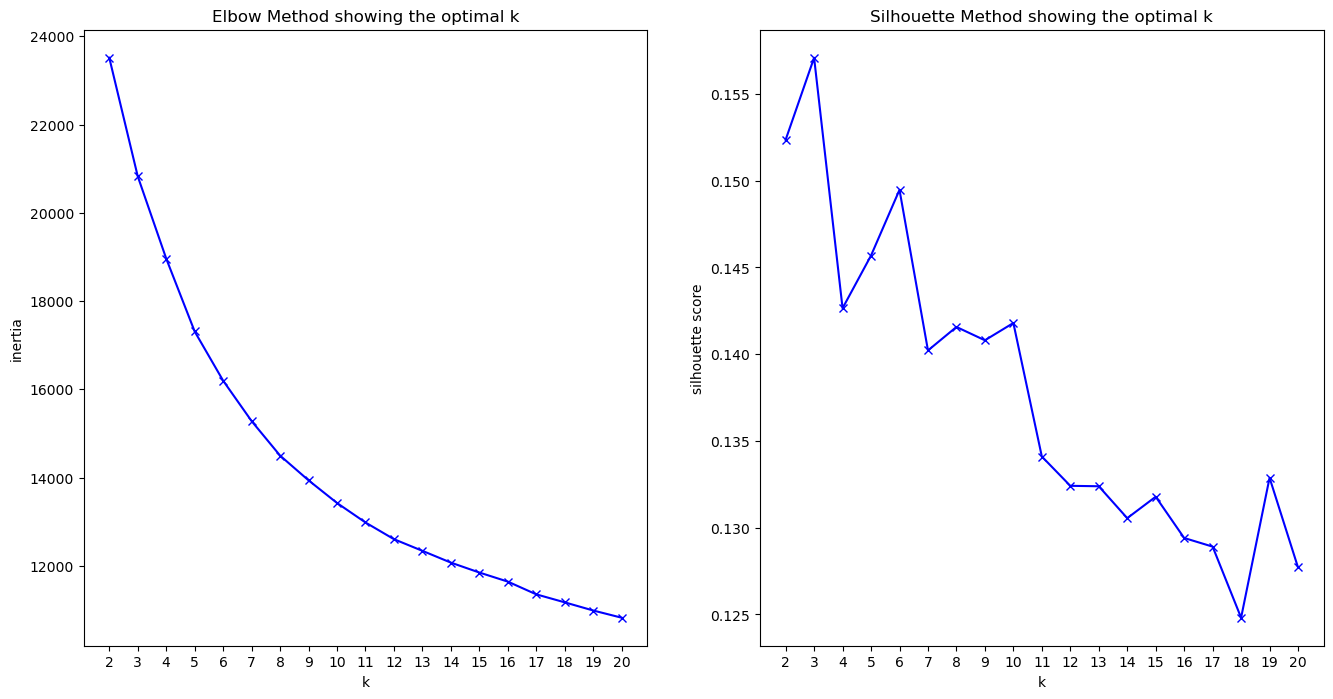

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].plot(K, inertia, 'bx-')
ax[0].set_xlabel('k')
ax[0].set_ylabel('inertia')
ax[0].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[0].set_title('Elbow Method showing the optimal k')
ax[1].plot(K, silhouette, 'bx-')
ax[1].set_xlabel('k')
ax[1].set_ylabel('silhouette score')
ax[1].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[1].set_title('Silhouette Method showing the optimal k')

## Based on Silhouette Method, K=3 looks better

In [12]:
kmeans = KMeans(n_clusters=3, random_state=1234)
kmeans.fit(X_scaled_df)

/Users/faryal/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=1234)

In [13]:
clusters = kmeans.predict(X_scaled_df)
pd.Series(clusters).value_counts().sort_index()
all_songs['clusters']=clusters
all_songs.tail()

,artist,title,ids,danceability,energy,key,loudness,mode,speechiness,acousticness,...,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,hot,clusters
2995,Tomkillsjerry,Focus,1YiFZjmohJD78nlsSjjHGT,0.644,0.301,10,-8.927,0,0.0308,0.03160,...,0.0768,119.989,audio_features,spotify:track:1YiFZjmohJD78nlsSjjHGT,https://api.spotify.com/v1/tracks/1YiFZjmohJD7...,https://api.spotify.com/v1/audio-analysis/1YiF...,250697,4,No,0
2996,Tomkillsjerry,The Cure,7o5E34q2K5cpQfy2P1WEGW,0.603,0.555,8,-10.284,0,0.0277,0.01680,...,0.1290,220.036,audio_features,spotify:track:7o5E34q2K5cpQfy2P1WEGW,https://api.spotify.com/v1/tracks/7o5E34q2K5cp...,https://api.spotify.com/v1/audio-analysis/7o5E...,219168,4,No,0
2997,Tomkillsjerry,Blocks,0Wdp9TyN3PqCoxSzH8vRwO,0.626,0.367,8,-11.263,1,0.0343,0.00349,...,0.1290,130.002,audio_features,spotify:track:0Wdp9TyN3PqCoxSzH8vRwO,https://api.spotify.com/v1/tracks/0Wdp9TyN3PqC...,https://api.spotify.com/v1/audio-analysis/0Wdp...,189806,4,No,0
2998,Tomkillsjerry,Liu Kang,2K7NWYBbqGzNLggH7LIhxy,0.616,0.572,11,-9.371,0,0.0755,0.01100,...,0.0389,113.338,audio_features,spotify:track:2K7NWYBbqGzNLggH7LIhxy,https://api.spotify.com/v1/tracks/2K7NWYBbqGzN...,https://api.spotify.com/v1/audio-analysis/2K7N...,247928,5,No,0
2999,Tomkillsjerry,Malvada,7bHO5sfLqKChU9FtQPlInR,0.520,0.407,9,-11.677,0,0.0394,0.27700,...,0.0688,200.094,audio_features,spotify:track:7bHO5sfLqKChU9FtQPlInR,https://api.spotify.com/v1/tracks/7bHO5sfLqKCh...,https://api.spotify.com/v1/audio-analysis/7bHO...,235259,4,No,0


In [14]:
all_songs.to_csv('./data/all_songs_clustered.csv',index=False)

In [15]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

In [37]:
def get_url_from_track(track_id):
    track = sp.track(track_id)
    uri = track['external_urls']['spotify']
    return uri

In [36]:
def recommend_song(df, model):
    # Get the song and artist name from user
    title = input('What is your favourite song?\n')
    artist = input('What is the artist name?\n')
    query = "track:" + title + " artist:" + artist 
    results = sp.search(q=query, limit=1)
    items = results['tracks']['items']

    # Check if the song was found on spotify
    if len(items) == 0:
        print("Unable to find song!")
        sample = "No song"
        url = None
        return sample, url

    # Get the first song
    item = items[0]
    # Get the song id
    song_id = item['id']
    
    # Get song features
    features = sp.audio_features((song_id))[0]
    
    # Create a dataframe of useful features of the song 
    dict_features = { key : [features[key]] for key in list(features.keys()) }
    features_df=pd.DataFrame(dict_features)
    features_df=features_df.drop(columns=["key", "mode", "duration_ms", "time_signature", "analysis_url", "id", "track_href", "type", "uri"], axis=1)

    # Scale features, loading model and getting the user_cluster
    features_scaled_np = scaler.transform(features_df)
    features_scaled_df = pd.DataFrame(features_scaled_np, columns=features_df.columns)
    user_cluster = model.predict(features_scaled_df)[0]

    # Check song id in hot songs
    is_in_hot_df = df[(df['ids'] == song_id) & (df['hot'] == 'Yes')]

    if len(is_in_hot_df) > 0:
        # If it is recommend a song from hot songs in the same cluster
        sample_df = df[(df['hot'] == 'Yes') & (df['clusters'] == user_cluster)].sample(ignore_index=True)
    else:
        # Else recommend a song from the not hot songs in the same cluster
        sample_df = df[(df['hot'] == 'No') & (df['clusters'] == user_cluster)].sample(ignore_index=True)

    url = get_url_from_track(sample_df['ids'].values[0])
    title = sample_df['title'].values[0]

    return title, url

In [35]:
print(recommend_song(all_songs, kmeans))

What is your favourite song?
Fukumean
What is the artist name?
Gunna
4i6cwNY6oIUU2XZxPIw82Y
{ 'album': { 'album_type': 'album',
             'artists': [ { 'external_urls': { 'spotify': 'https://open.spotify.com/artist/06HL4z0CvFAxyc27GXpf02'},
                            'href': 'https://api.spotify.com/v1/artists/06HL4z0CvFAxyc27GXpf02',
                            'id': '06HL4z0CvFAxyc27GXpf02',
                            'name': 'Taylor Swift',
                            'type': 'artist',
                            'uri': 'spotify:artist:06HL4z0CvFAxyc27GXpf02'}],
             'available_markets': [ 'AR',
                                    'AU',
                                    'AT',
                                    'BE',
                                    'BO',
                                    'BR',
                                    'BG',
                                    'CA',
                                    'CL',
                                    'CO',
  